In [24]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row", 81)
pd.set_option("display.max_column", 80)

In [3]:
data = pd.read_csv("../../datasets/Phishing.csv")

In [4]:
data.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,2,12,5.5,8,4.083334,2,15,7,0,0,0,0,0,0,0,0,0,0,80,12,61,61,2,2,2,0.762500,0.025000,0.166667,0.150000,5.083334,0.032787,0,-1,1,-1,0.750000,-1,10,0,6,2,2,-1,54,11,0,0,39,-1,48,8,8,8,-1,0,0,5,0,7,-1,0.125000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,6,1,-1,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
1,0,3,12,5.0,10,3.583333,3,12,8,2,0,2,2,0,0,0,0,0,0,78,17,54,54,40,4,2,0.692308,0.025641,0.117647,0.217949,3.176471,0.037037,0,-1,3,-1,0.647059,-1,8,0,6,2,0,-1,54,15,0,31,4,-1,40,10,8,7,-1,0,0,4,0,8,-1,0.102564,0.0,0.666667,0.044444,0.000000,-1.000000,7,2,2,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
2,2,2,11,4.0,5,4.750000,2,16,11,0,0,0,0,0,0,0,0,0,0,71,9,54,54,2,2,7,0.760563,0.098592,0.777778,0.126761,6.000000,0.129630,0,-1,1,-1,0.666667,2,0,0,0,0,0,0,57,8,19,19,6,2,22,5,7,7,2,0,1,6,0,3,1,0.000000,0.0,0.000000,0.000000,NaN,0.000000,8,1,4,2,0,1,0.677701,1.000000,0.677704,0.916667,0.00000,0.898227,benign
3,0,2,7,4.5,7,5.714286,2,15,10,0,0,0,0,0,0,0,0,0,0,64,10,47,47,2,2,2,0.734375,0.031250,0.200000,0.156250,4.700000,0.042553,0,-1,1,-1,0.800000,-1,0,0,0,0,0,-1,53,9,5,5,30,-1,33,7,11,7,-1,0,0,4,0,3,-1,0.000000,0.0,0.000000,0.000000,NaN,-1.000000,5,1,2,0,0,-1,0.696067,0.879588,0.818007,0.753585,0.00000,-1.000000,benign
4,19,2,10,6.0,9,2.250000,2,9,5,0,0,0,0,0,0,0,0,0,0,68,13,48,48,2,2,35,0.705882,0.514706,2.692308,0.191176,3.692308,0.729167,0,-1,2,-1,0.769231,13,6,0,0,0,6,6,48,12,3,3,26,12,39,9,7,7,13,0,2,3,0,4,3,0.088235,0.0,0.000000,0.139535,0.153846,0.171429,9,1,1,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign


# 1.Exploration des données

## objectif : 
- comprendre du mieux possible nos données
- développer une premiere strategie de modélisation

## Checklist de base 
#### Analyse de forme :
- **variable target** : URL_Type_obf_Type 
- **lignes et colonnes** :  36707, 80
- **types de variables** : 21 quantitative, 59 qualitative
- **analyse des valeurs manquantes** : NumberRate_Extension               0.478623
Entropy_DirectoryName              0.118826
avgpathtokenlen                    0.017635
Entropy_Filename                   0.012364
argPathRatio                       0.000586
NumberRate_DirectoryName           0.000586
NumberRate_FileName                0.000586
NumberRate_AfterPath               0.000195
Entropy_Afterpath                  0.000195
Entropy_Extension                  0.000195
                                    toutes les autres colonnes sont remplies.

#### Analyse de fond :
- **visualisation de la target** : dataset equilibré
- **Signification des variables** :
        - variables quantitatives non standardisées, certains semblent suivre une courbe gaussienne et d'autres semblent présenter des outsiders
        - ISIpAddressInDomainName a une unique valeur (ne sert a rien)
        

- **relation variable/target** :

In [5]:
df = data.copy()

In [6]:
df.shape

(15367, 80)

int64      58
float64    21
object      1
dtype: int64

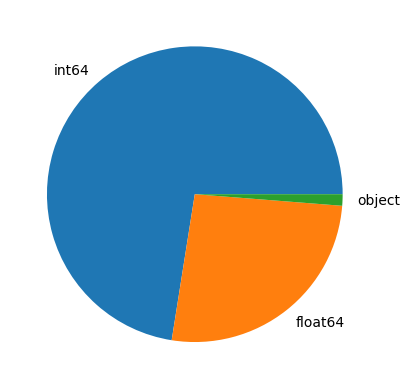

In [7]:
df.dtypes.value_counts().plot.pie()
df.dtypes.value_counts()


In [8]:
df.replace("?", np.nan, inplace = True)
df.replace([np.inf, -np.inf], np.nan, inplace = True)

<Axes: >

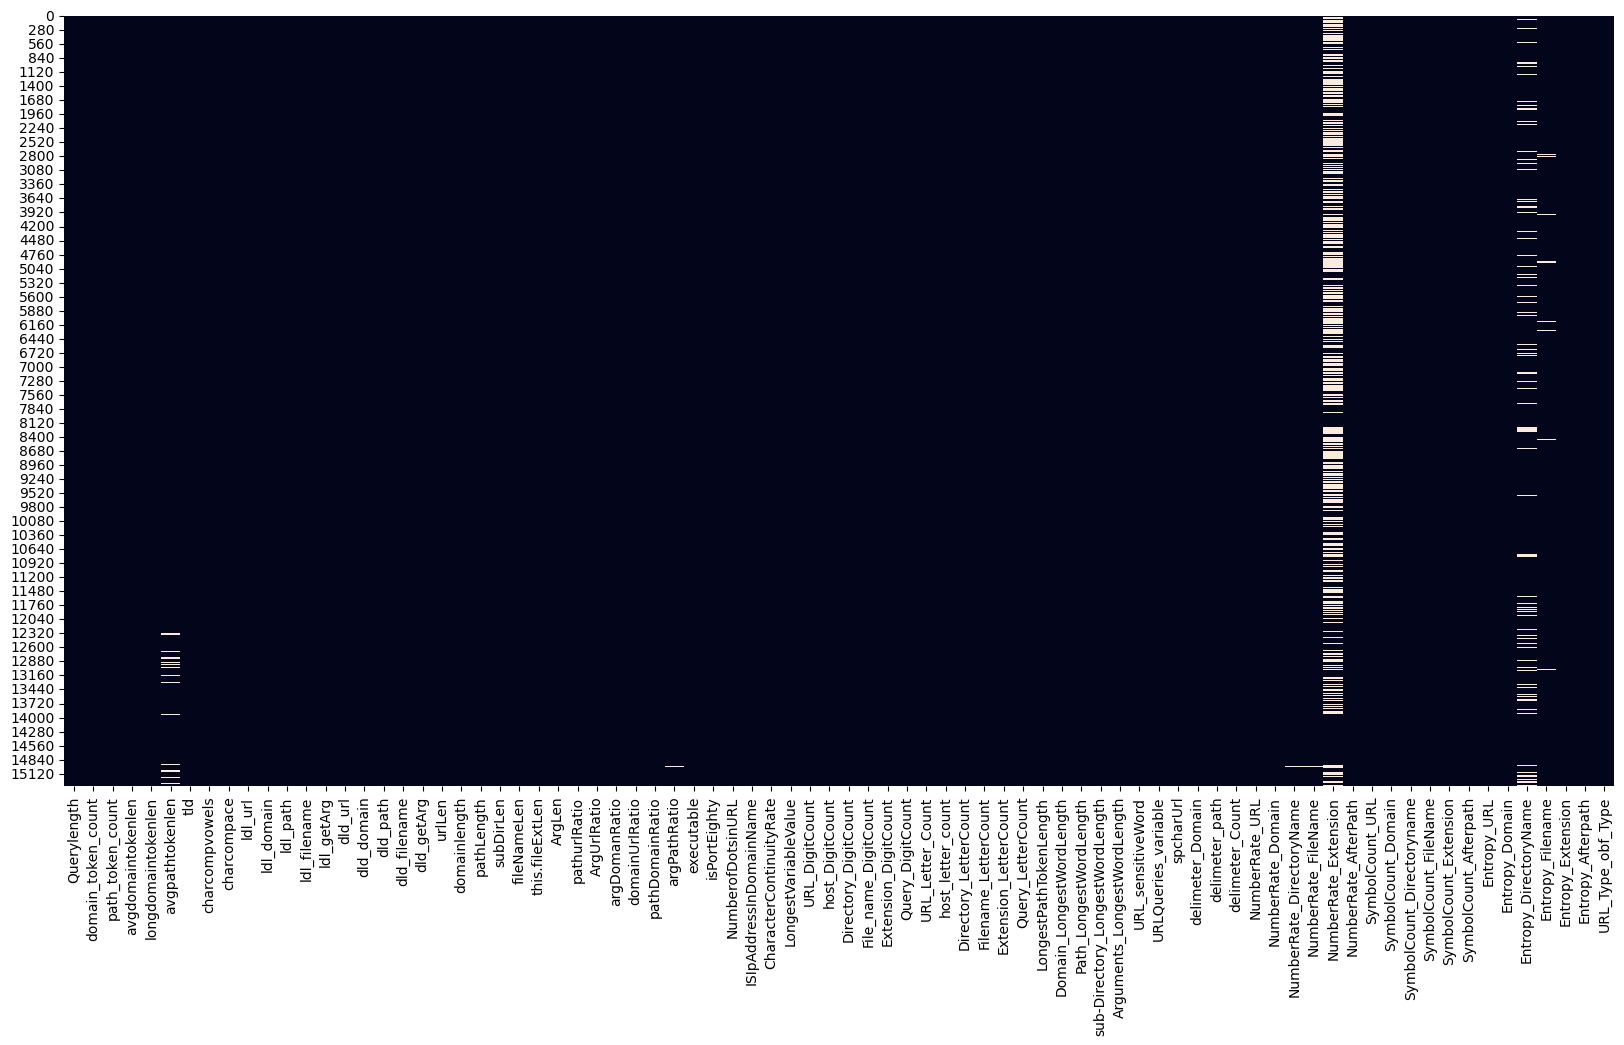

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar = False)

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = False)

NumberRate_Extension               0.478623
Entropy_DirectoryName              0.118826
avgpathtokenlen                    0.017635
Entropy_Filename                   0.012364
argPathRatio                       0.000586
NumberRate_DirectoryName           0.000586
NumberRate_FileName                0.000586
NumberRate_AfterPath               0.000195
Entropy_Afterpath                  0.000195
Entropy_Extension                  0.000195
Querylength                        0.000000
Arguments_LongestWordLength        0.000000
sub-Directory_LongestWordLength    0.000000
Path_LongestWordLength             0.000000
Domain_LongestWordLength           0.000000
Extension_LetterCount              0.000000
LongestPathTokenLength             0.000000
Query_LetterCount                  0.000000
URLQueries_variable                0.000000
Filename_LetterCount               0.000000
Directory_LetterCount              0.000000
host_letter_count                  0.000000
URL_Letter_Count                

## Analyse de fond

Examen de la colonne target




In [11]:
df["URL_Type_obf_Type"].value_counts()

benign      7781
phishing    7586
Name: URL_Type_obf_Type, dtype: int64

## histogramme des variables continues

/tmp/ipykernel_41542/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipykernel_41542/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipykernel_41542/2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed i

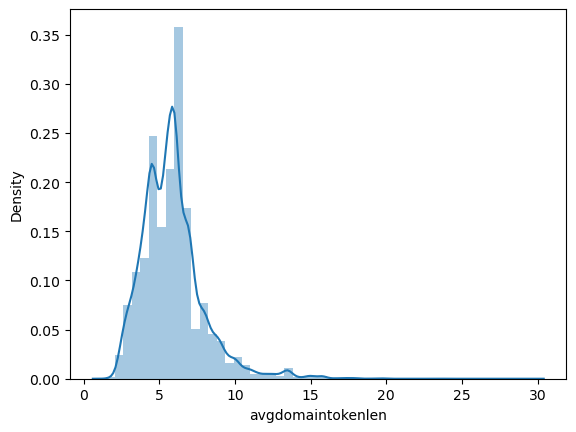

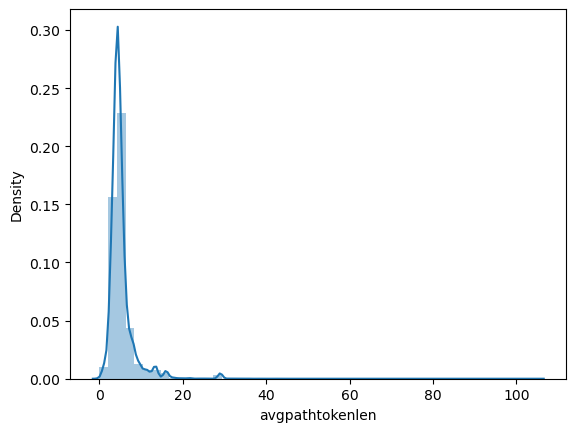

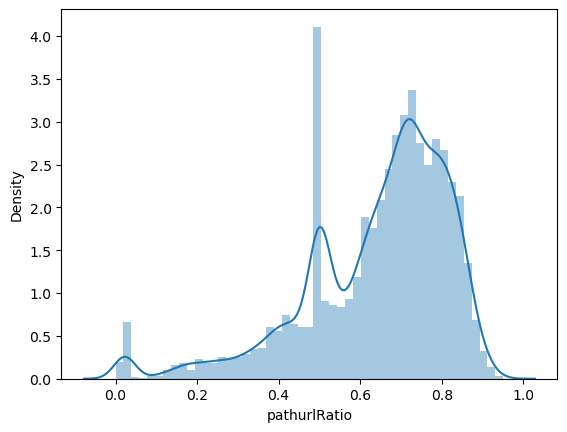

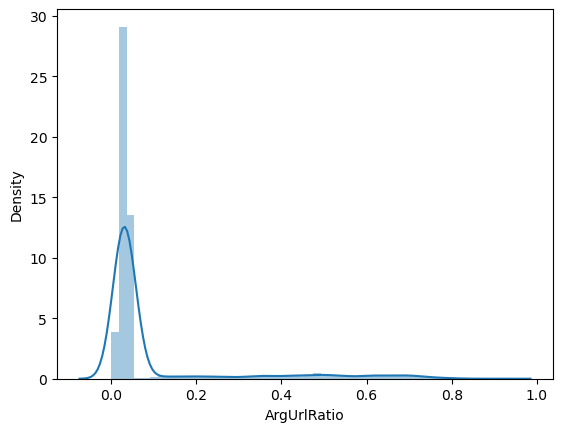

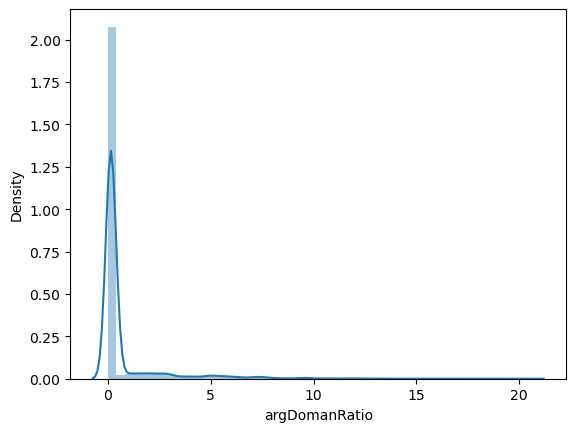

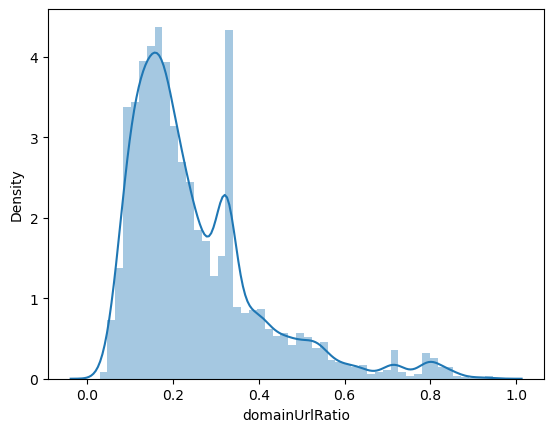

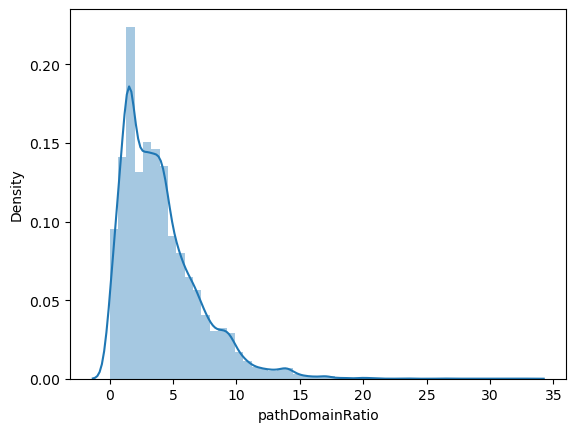

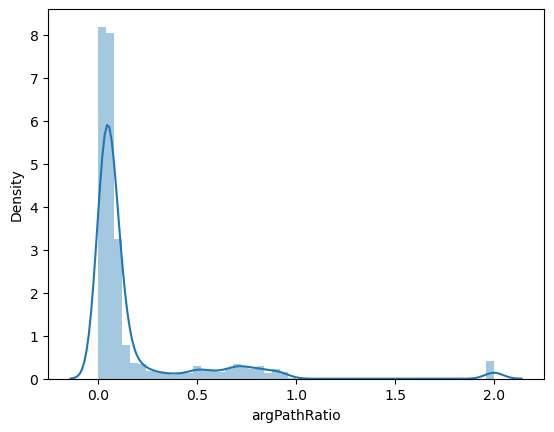

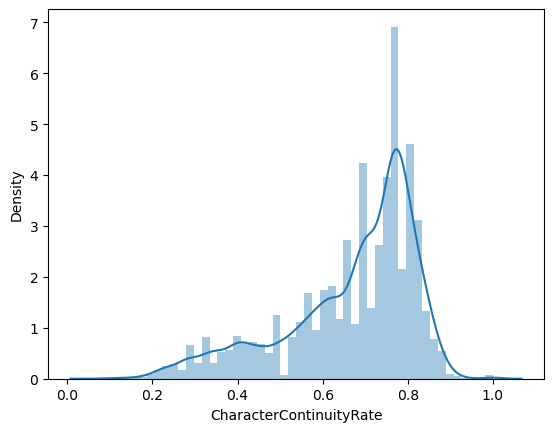

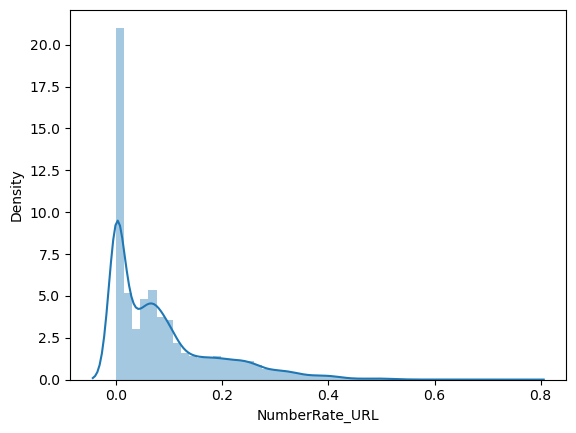

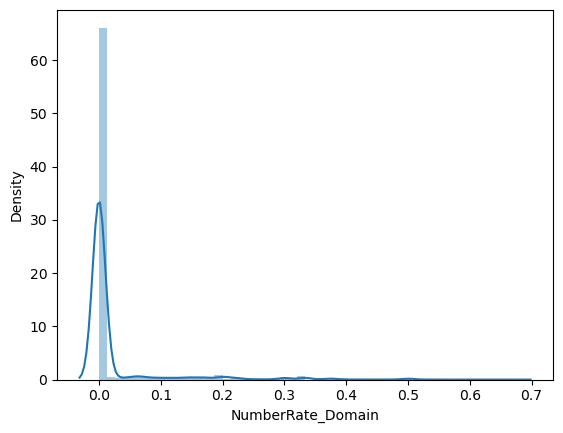

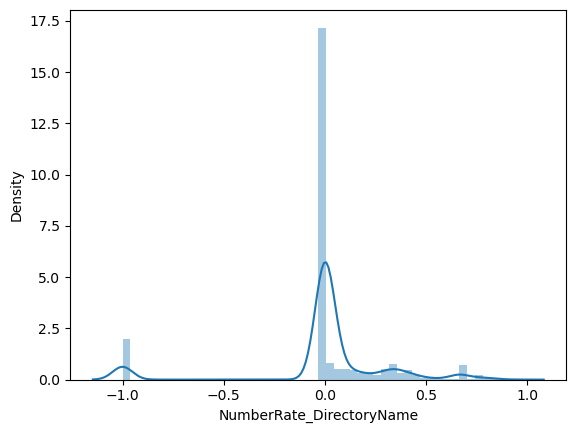

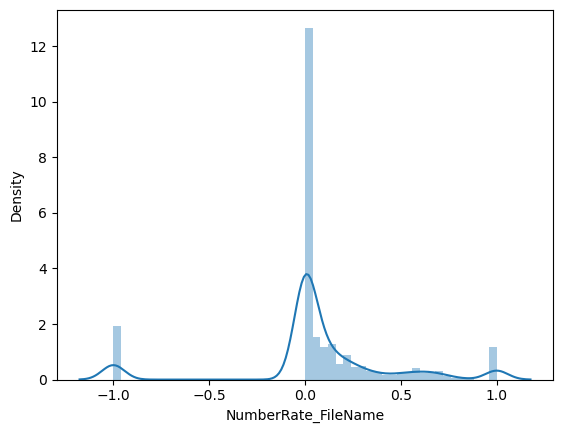

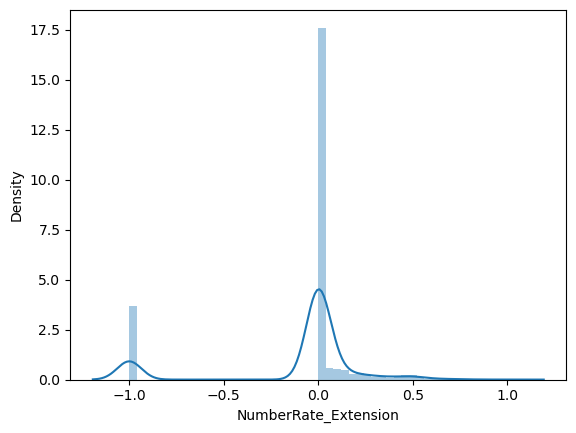

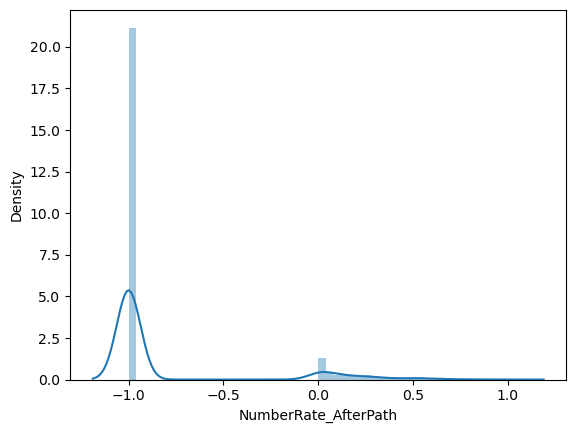

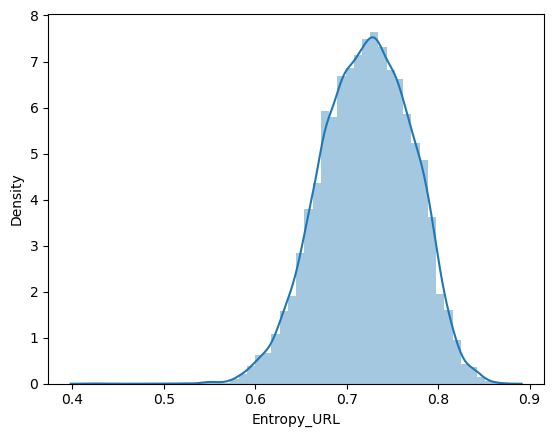

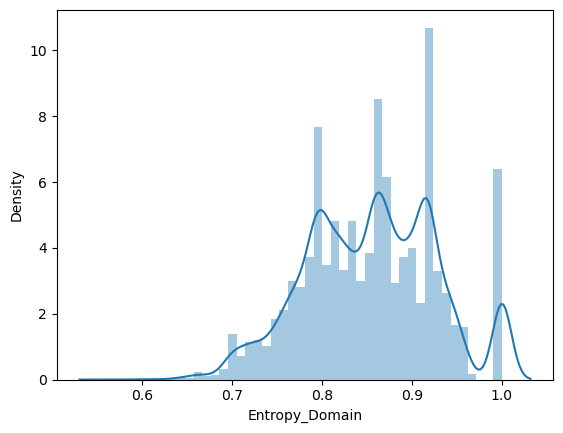

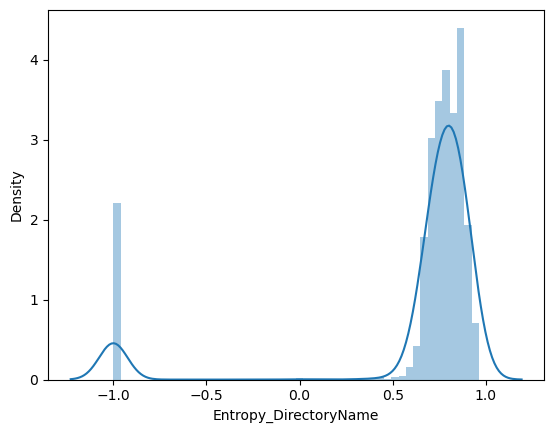

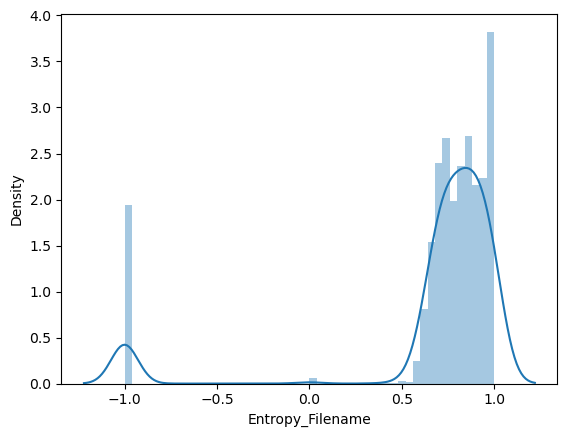

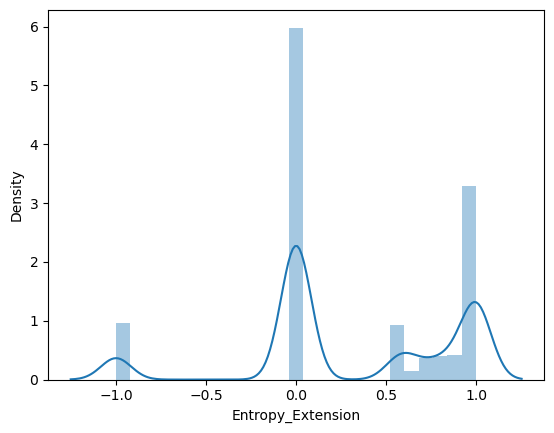

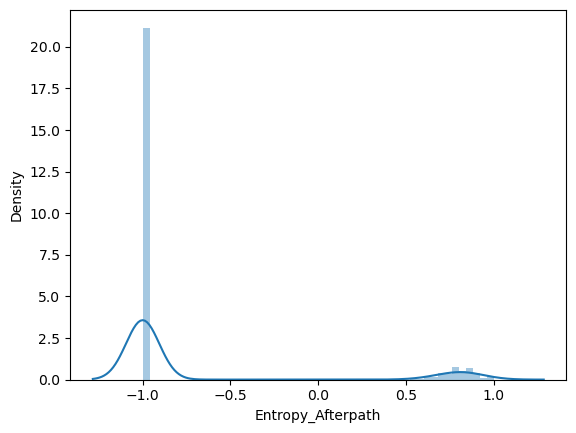

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

## Variable qualitatives

In [13]:
for col in df.select_dtypes('int'):
    #plt.figure()
    #sns.displot(df[col])
    print(f"{col :-<50} {len(df[col].unique())}")

Querylength--------------------------------------- 113
domain_token_count-------------------------------- 15
path_token_count---------------------------------- 43
longdomaintokenlen-------------------------------- 52
tld----------------------------------------------- 15
charcompvowels------------------------------------ 68
charcompace--------------------------------------- 55
ldl_url------------------------------------------- 47
ldl_domain---------------------------------------- 20
ldl_path------------------------------------------ 45
ldl_filename-------------------------------------- 20
ldl_getArg---------------------------------------- 39
dld_url------------------------------------------- 33
dld_domain---------------------------------------- 12
dld_path------------------------------------------ 32
dld_filename-------------------------------------- 13
dld_getArg---------------------------------------- 31
urlLen-------------------------------------------- 228
domainlength--------------

## relation target/variable

### creation des sous ensemble

In [16]:
target = "URL_Type_obf_Type"

phishing_df = df[df[target] == "phishing"]
benign_df = df[df[target] == "benign"]

/tmp/ipykernel_41542/428810264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(phishing_df[col], label = "phishing")
/tmp/ipykernel_41542/428810264.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(benign_df[col], label = "benign")
/tmp/ipykernel_41542/428810264.py:3: UserWarning: 

`distp

ValueError: could not convert string to float: 'phishing'

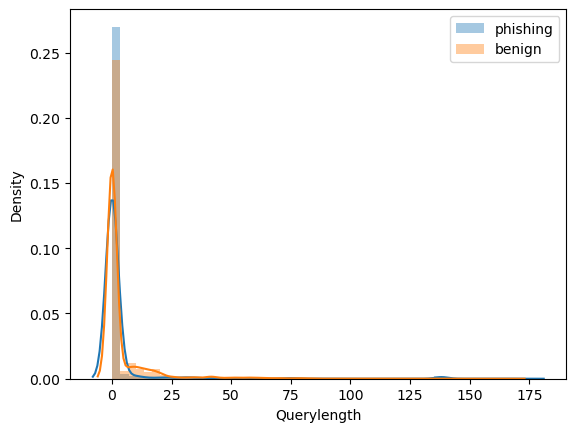

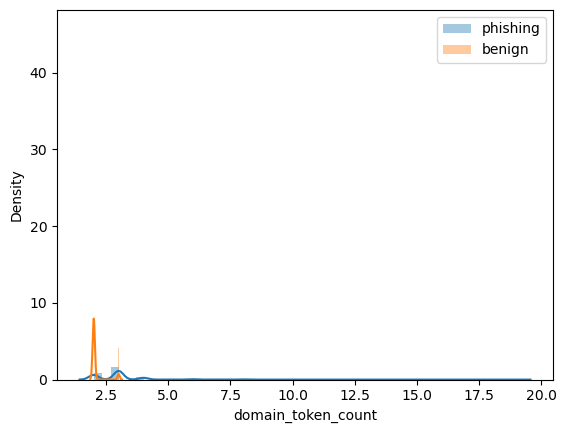

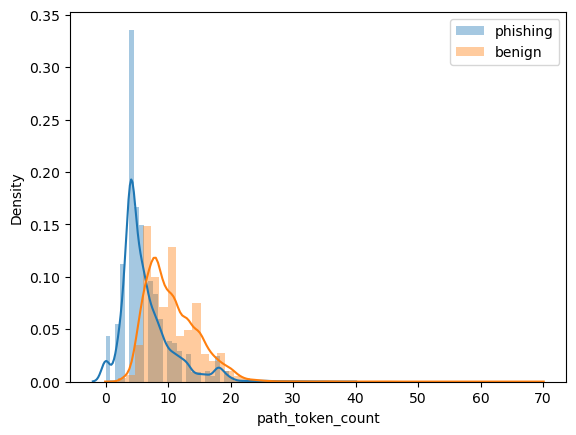

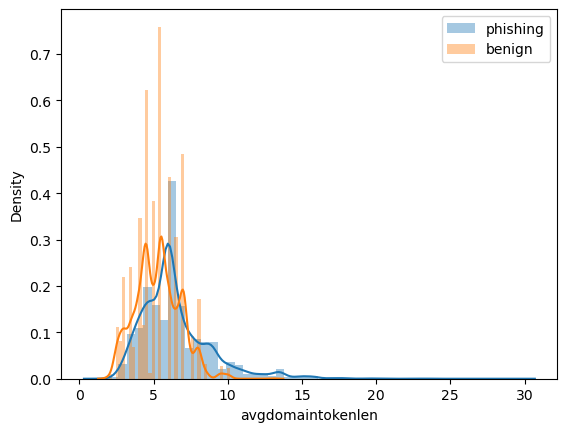

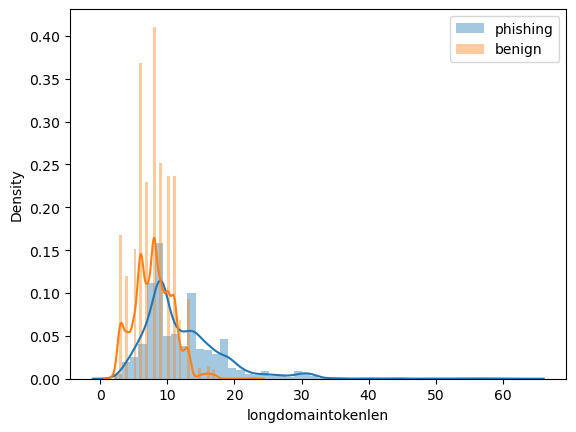

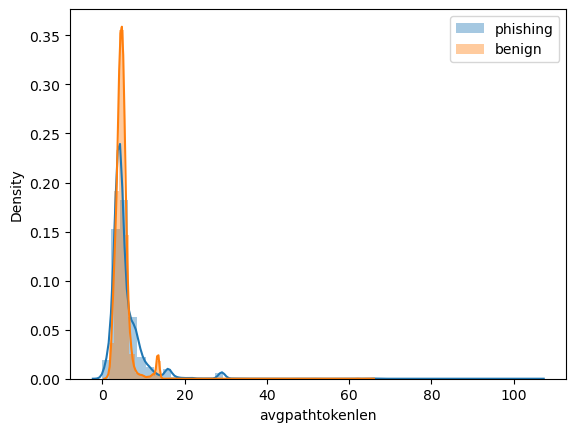

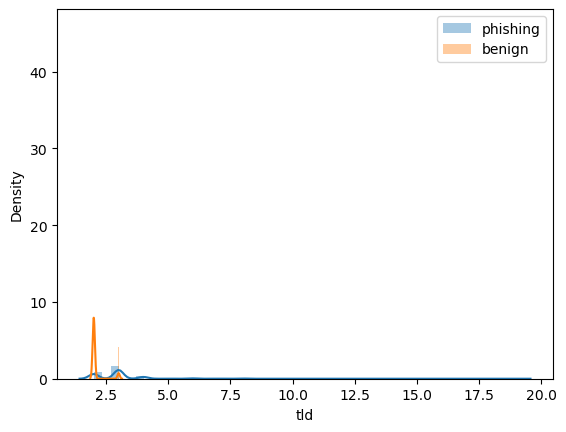

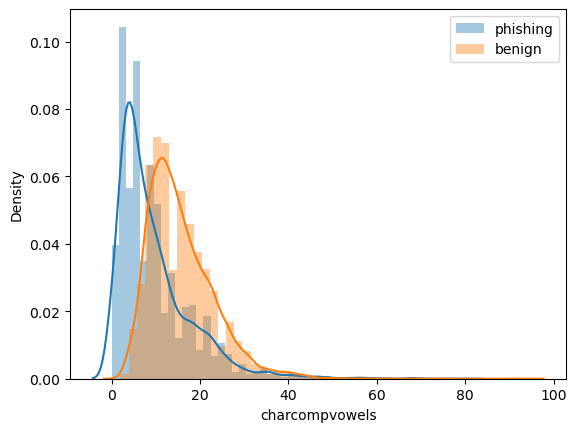

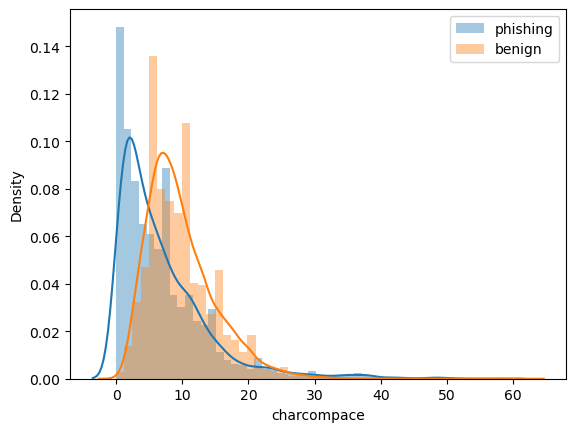

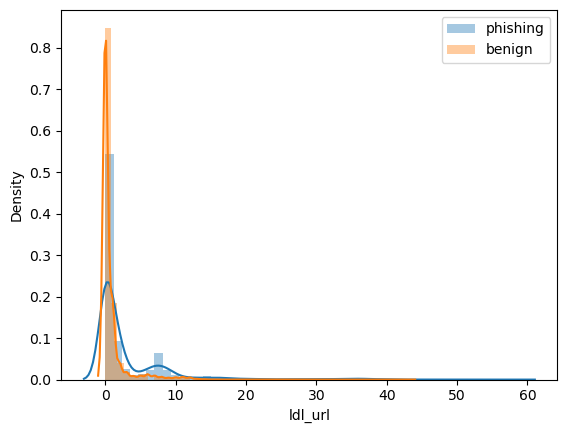

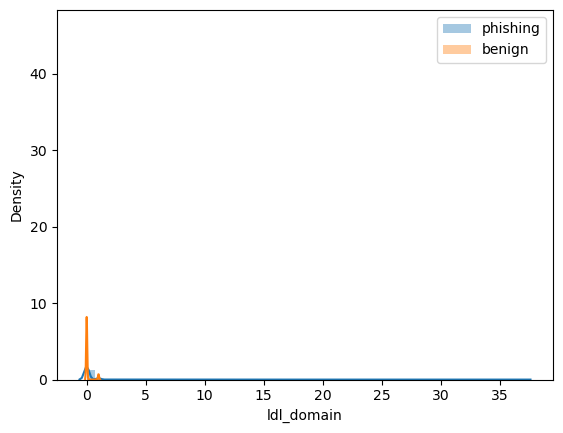

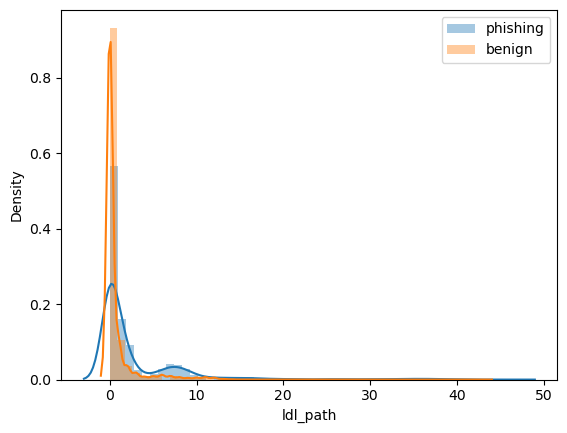

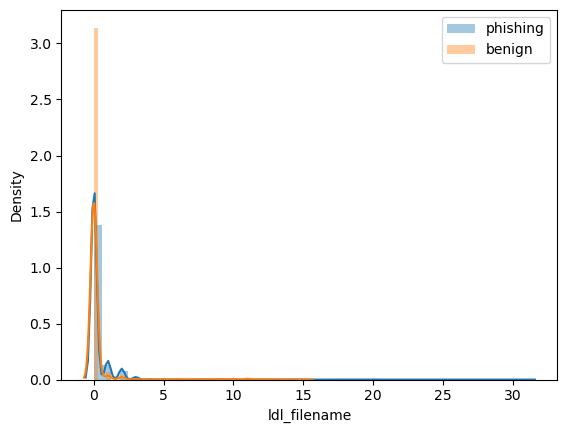

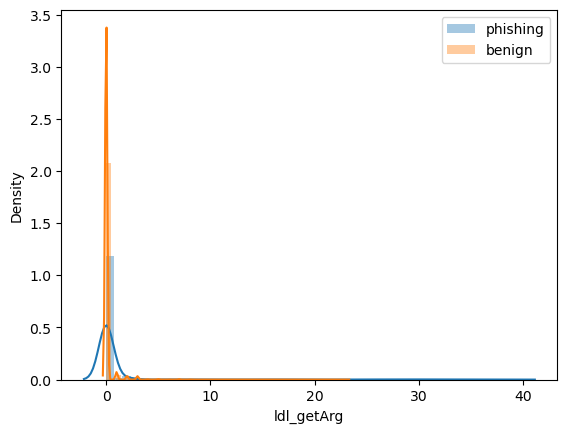

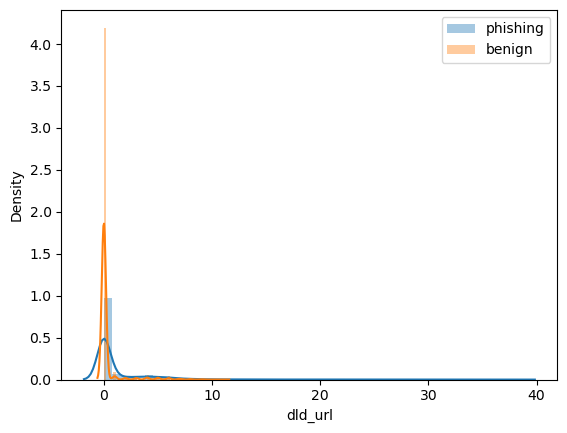

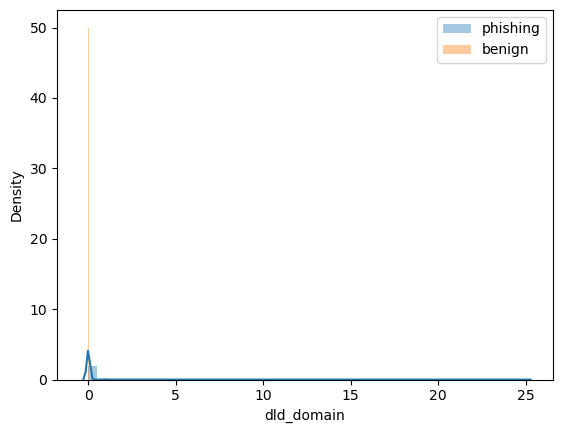

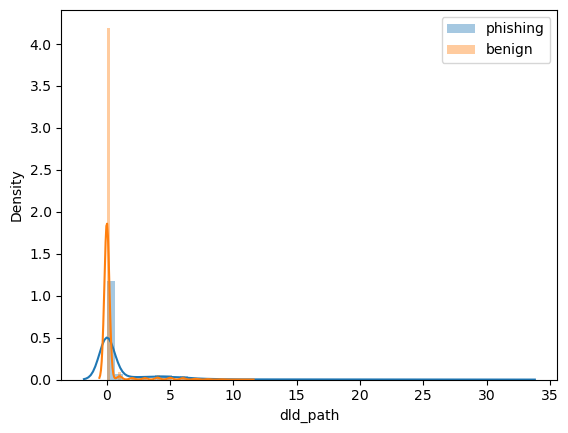

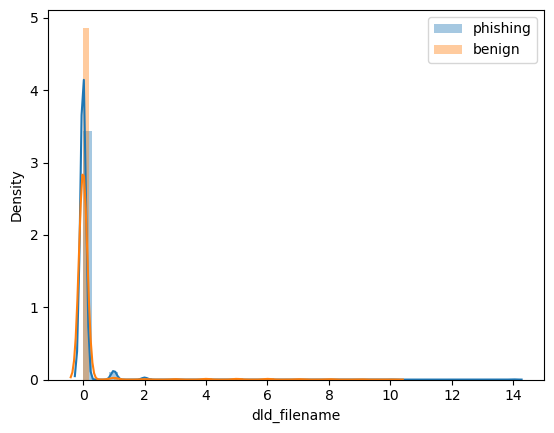

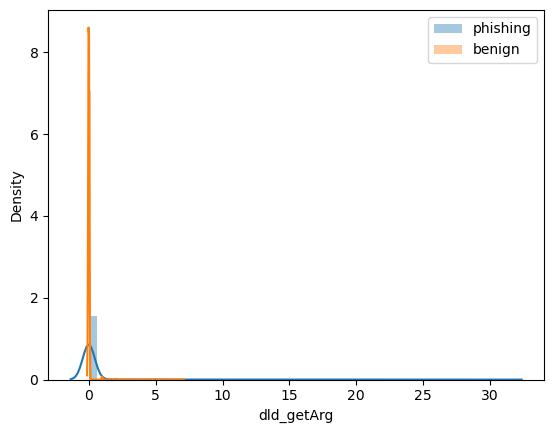

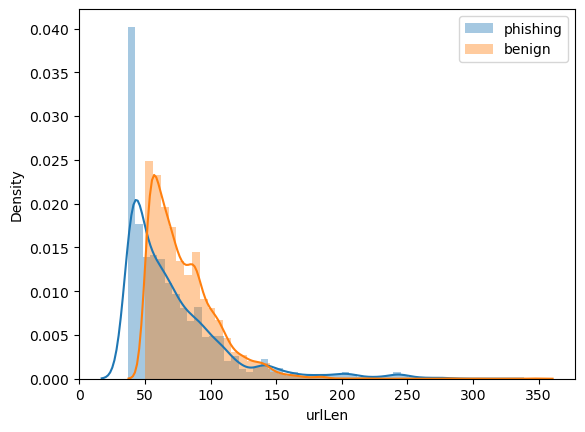

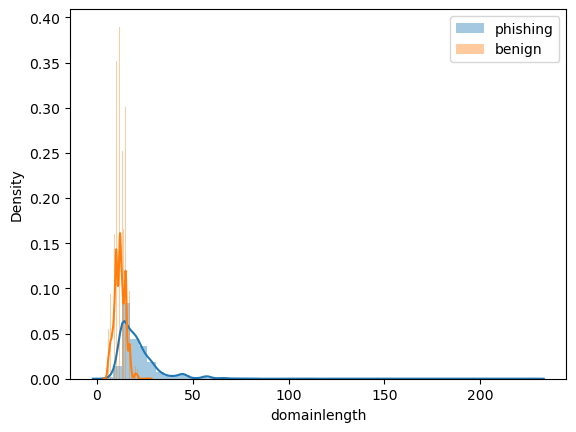

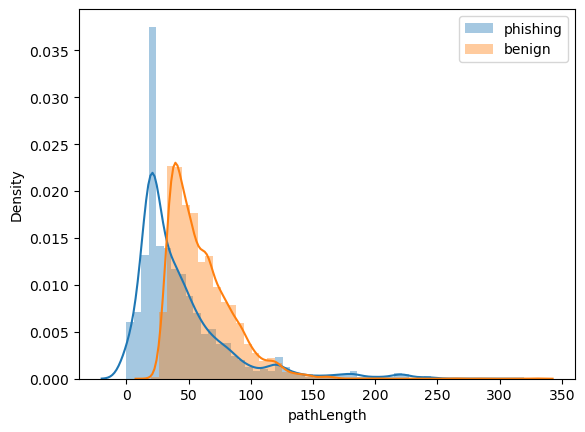

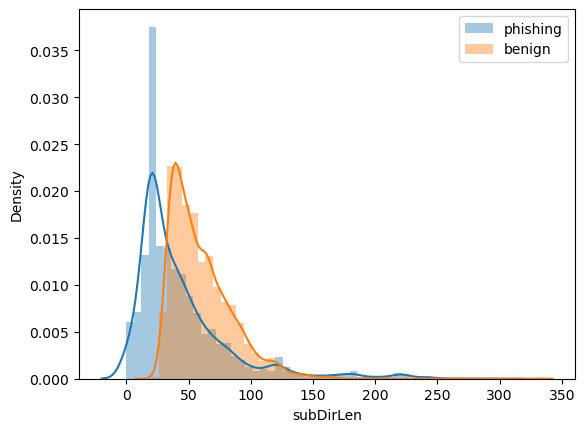

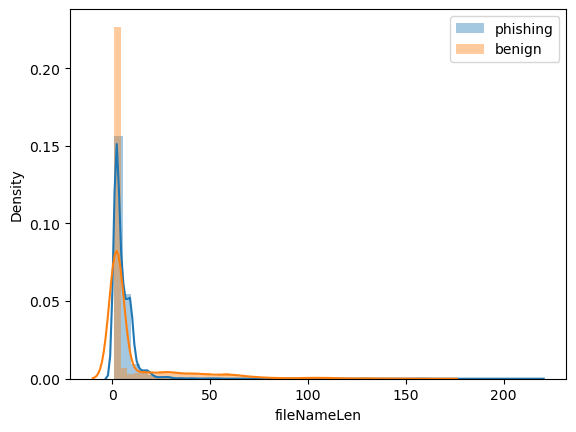

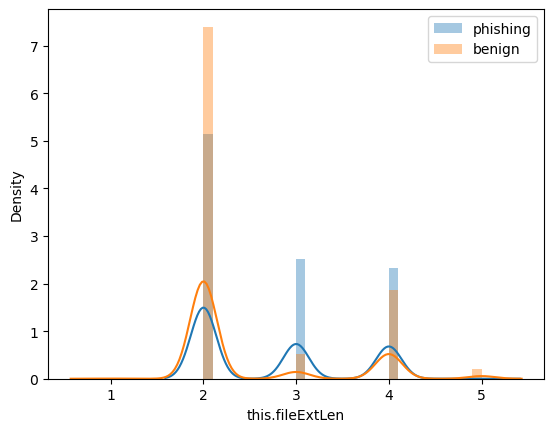

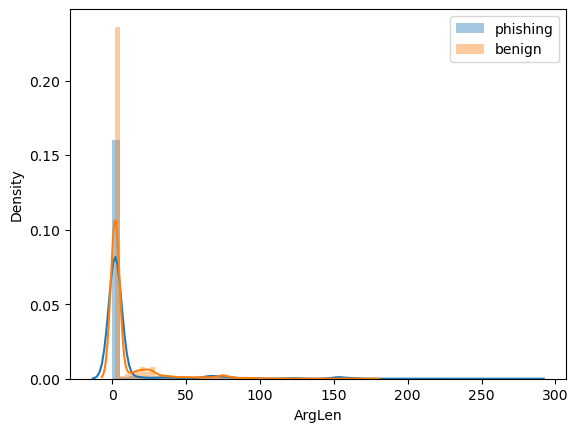

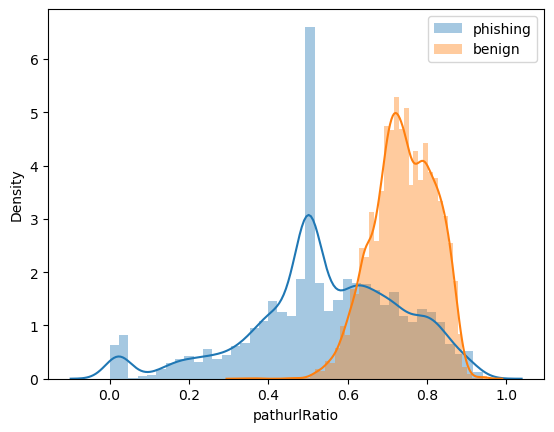

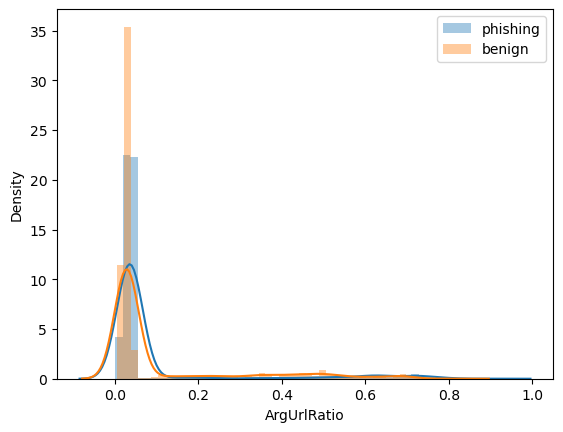

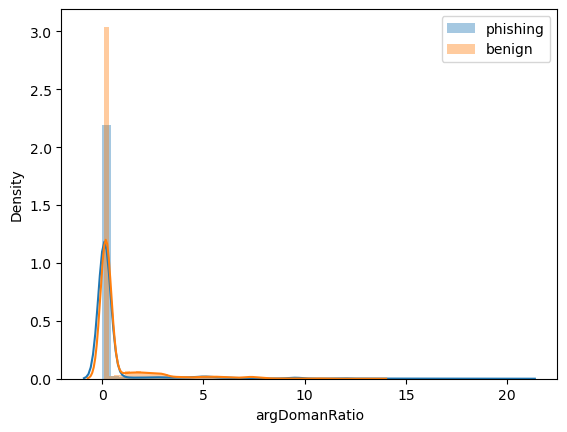

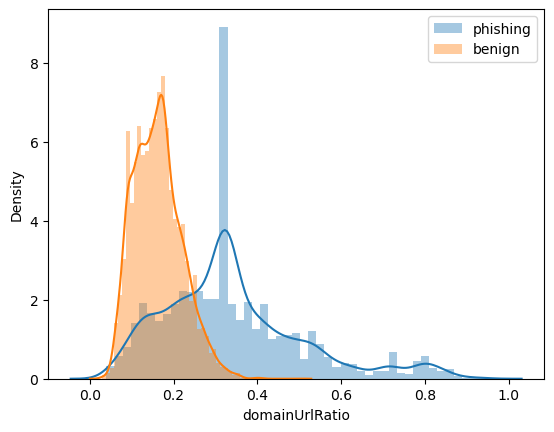

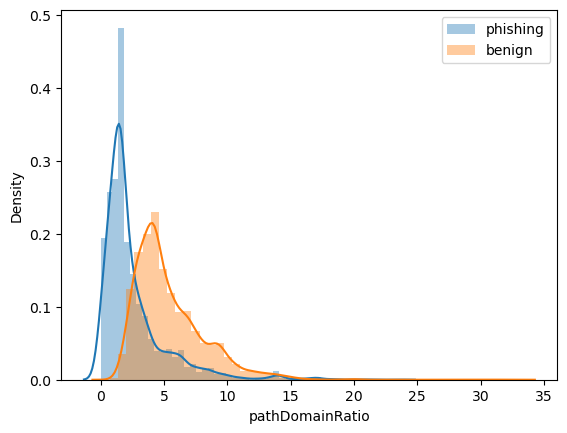

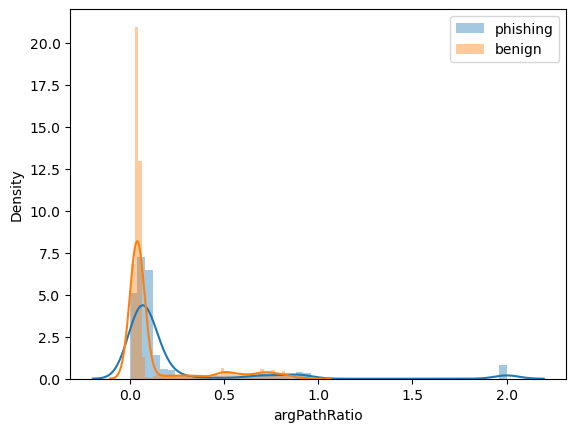

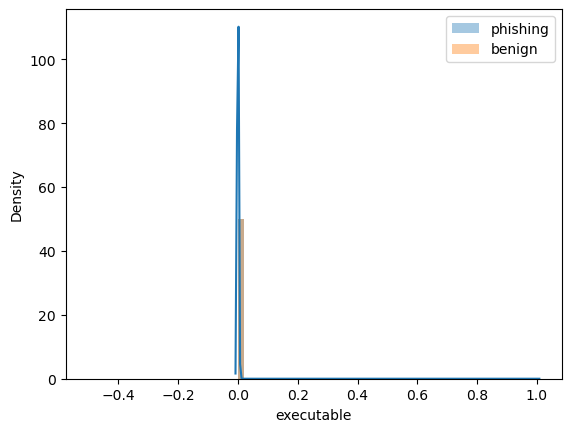

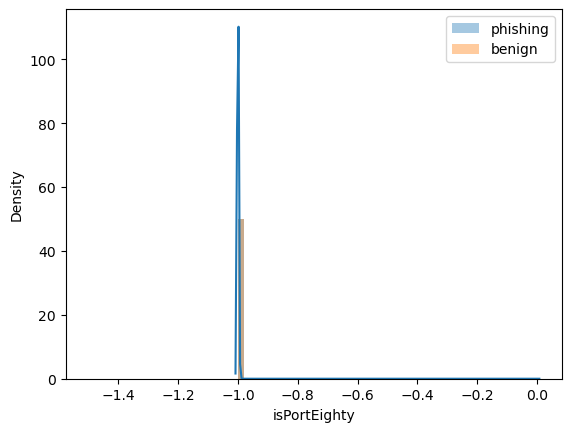

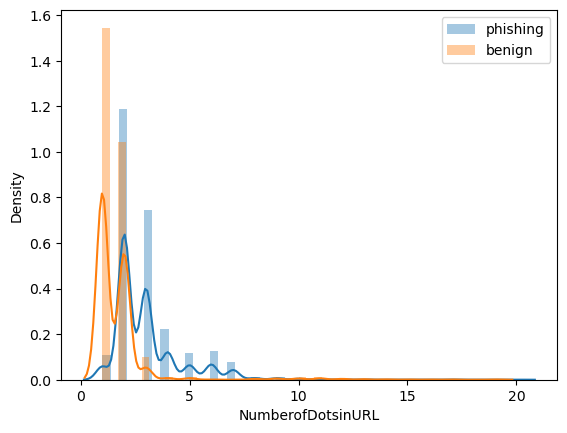

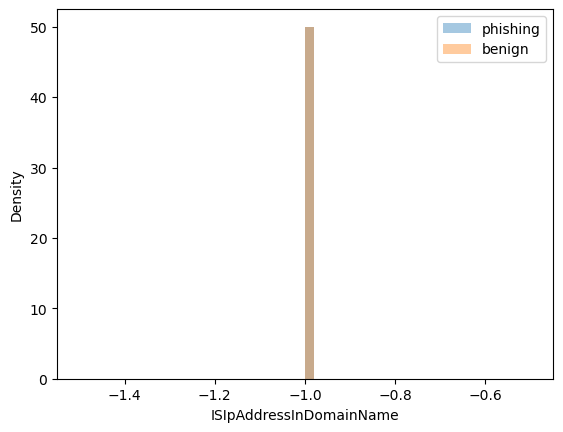

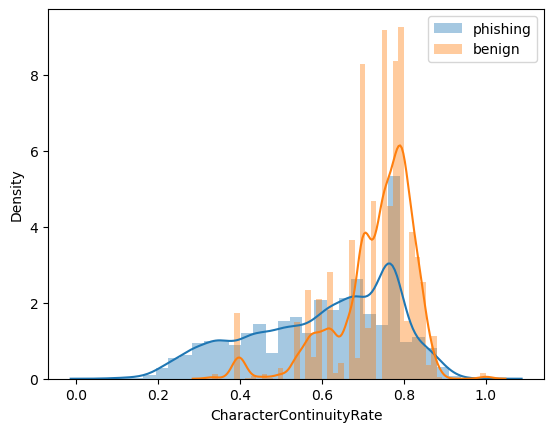

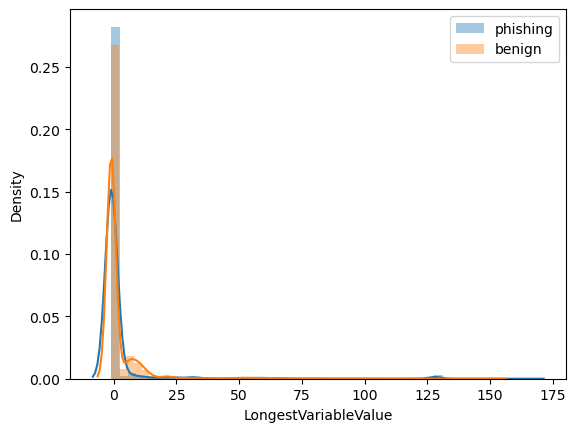

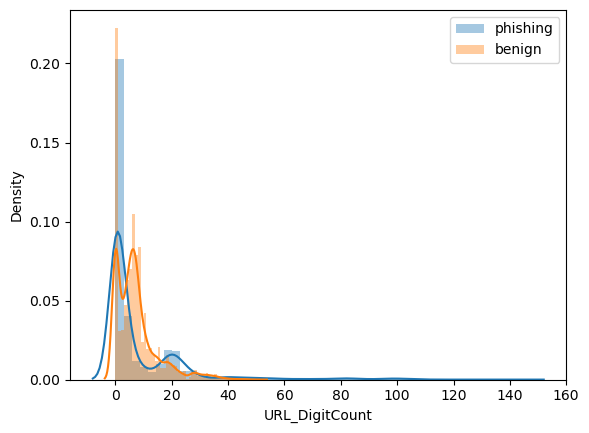

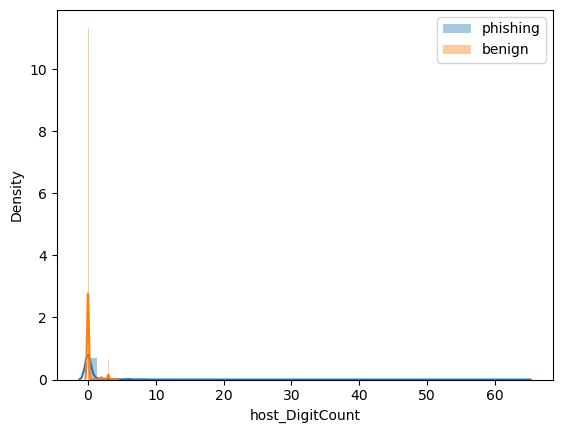

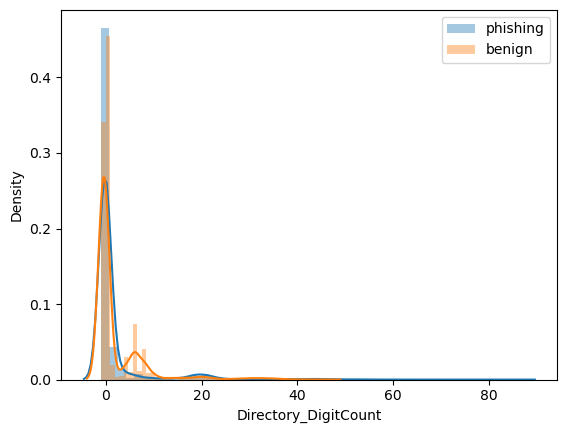

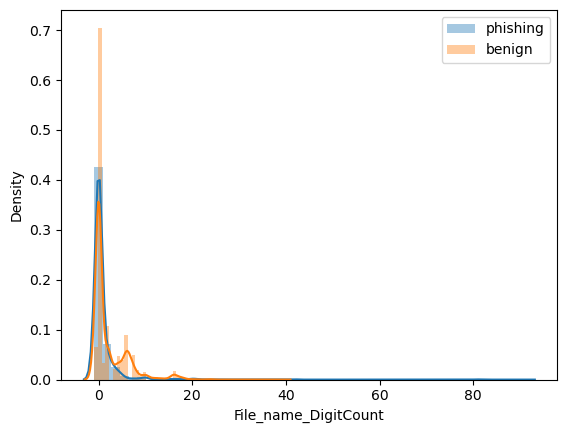

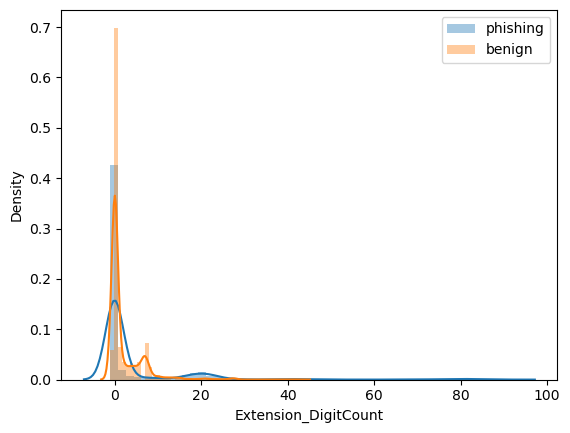

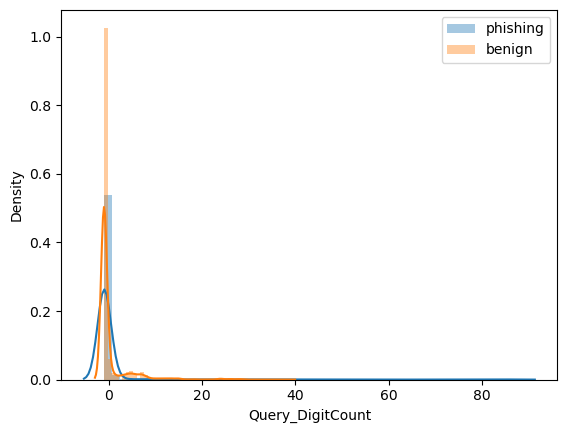

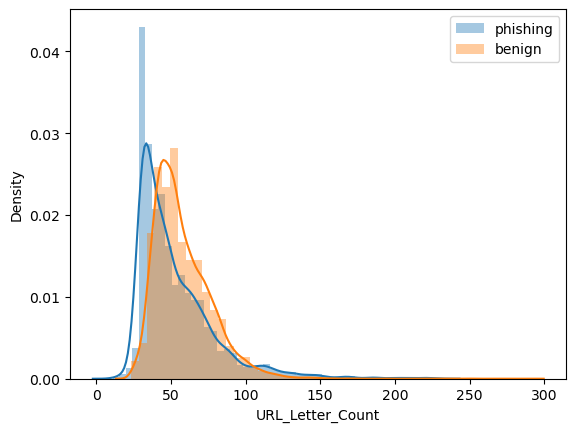

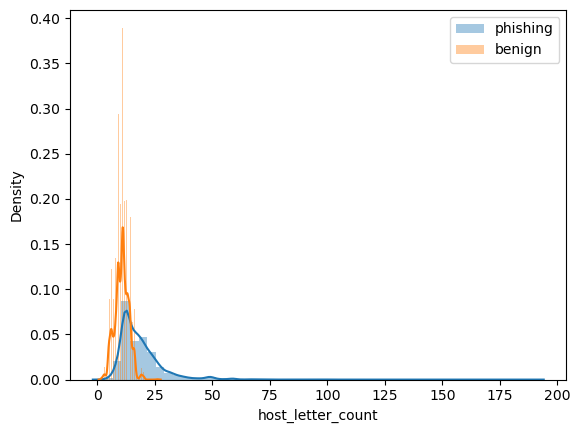

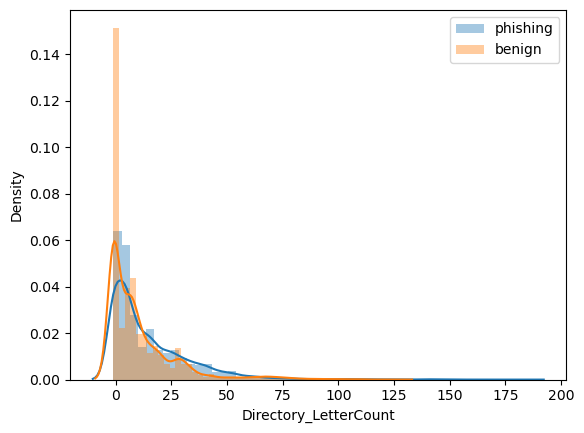

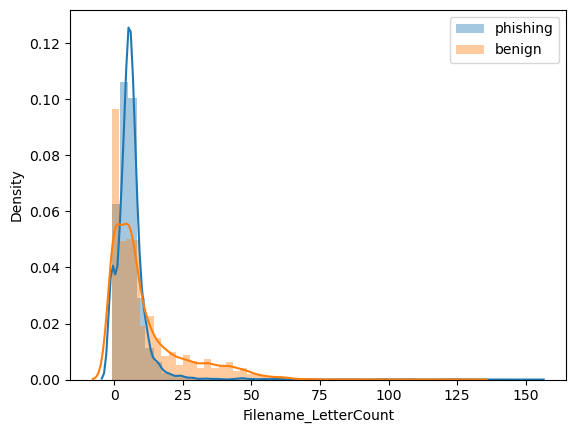

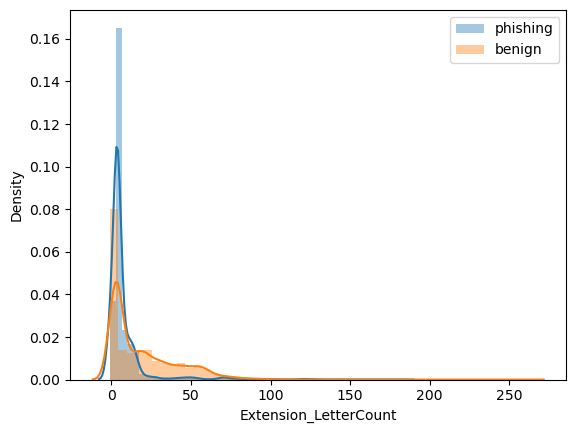

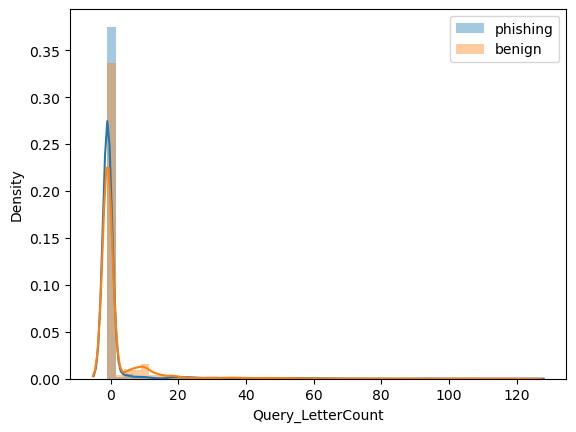

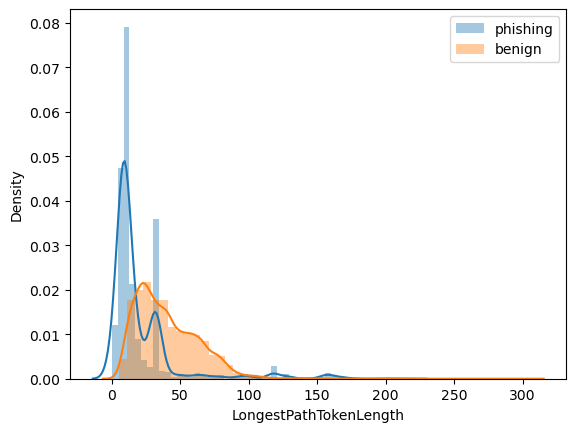

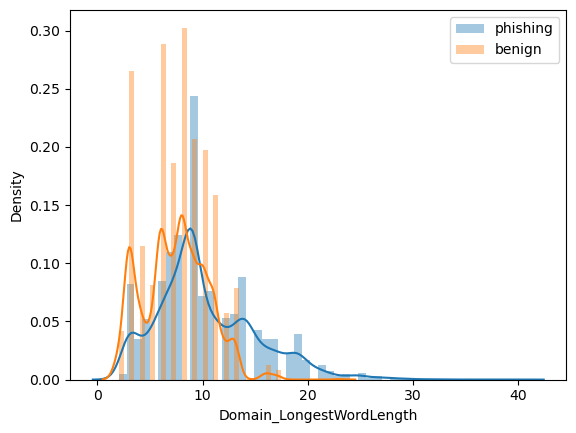

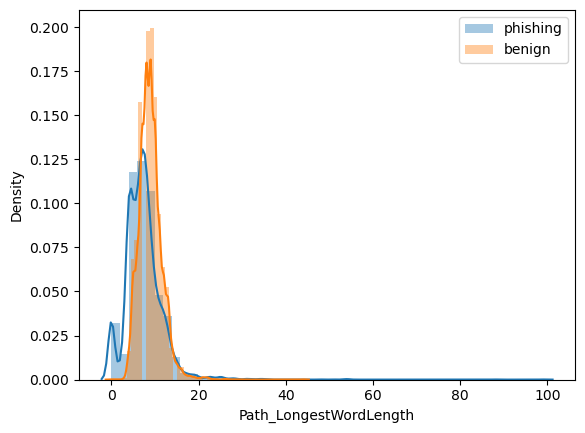

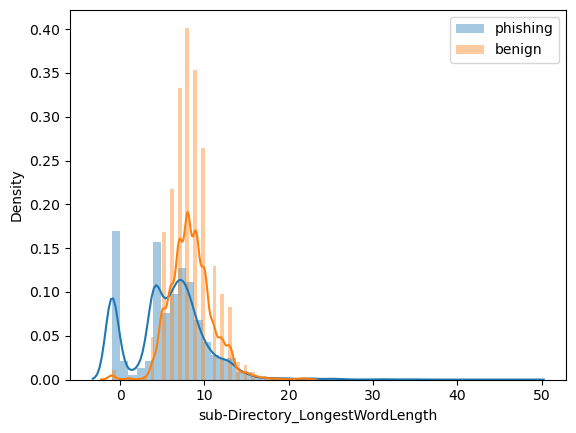

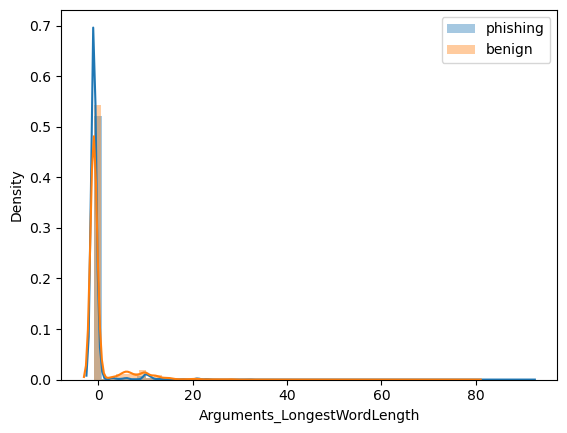

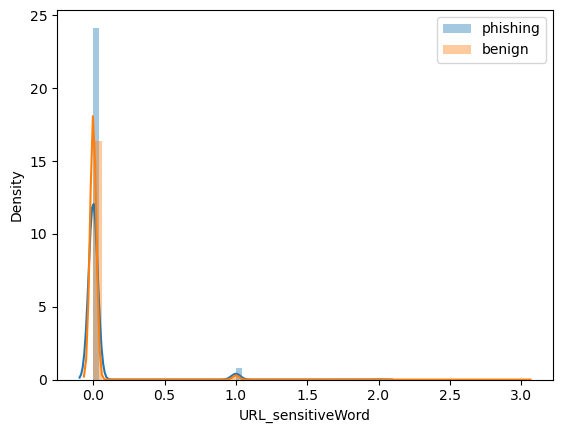

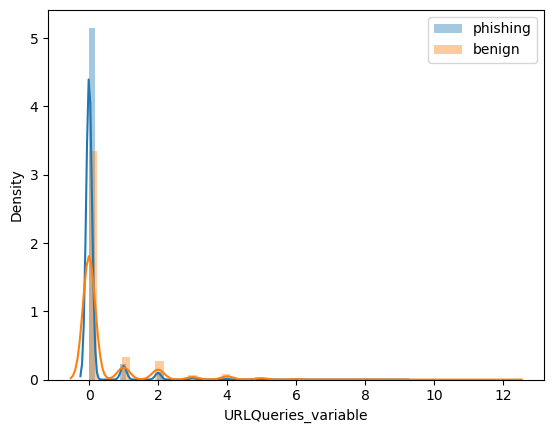

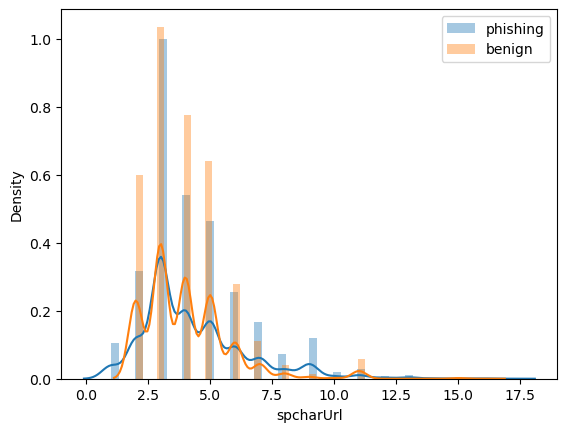

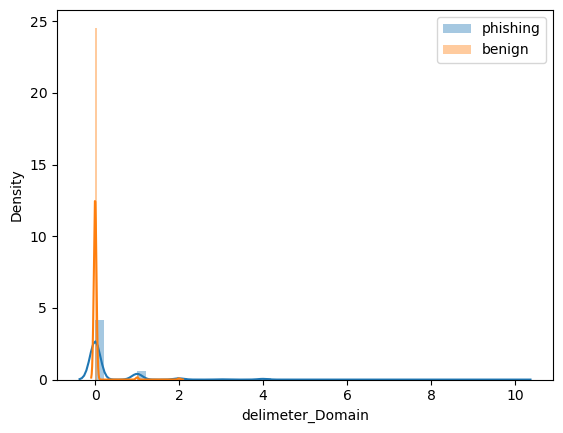

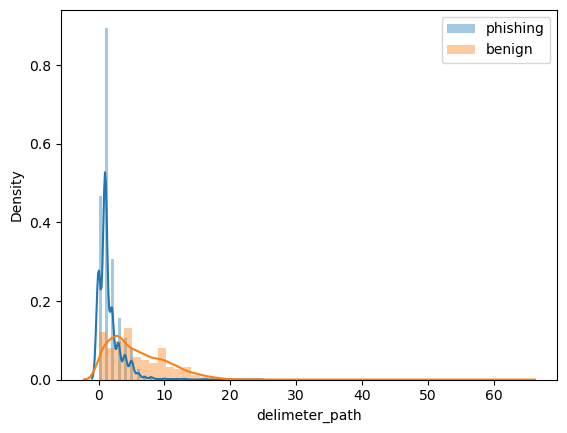

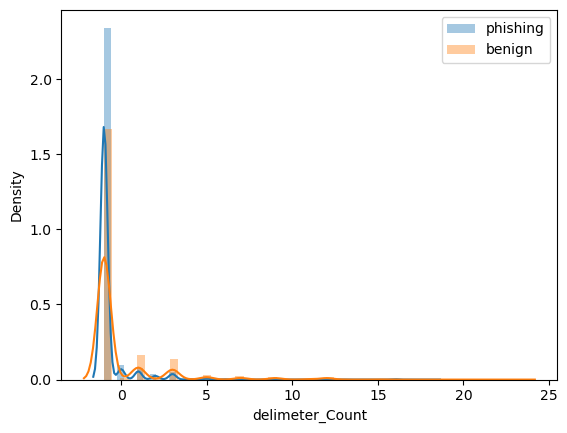

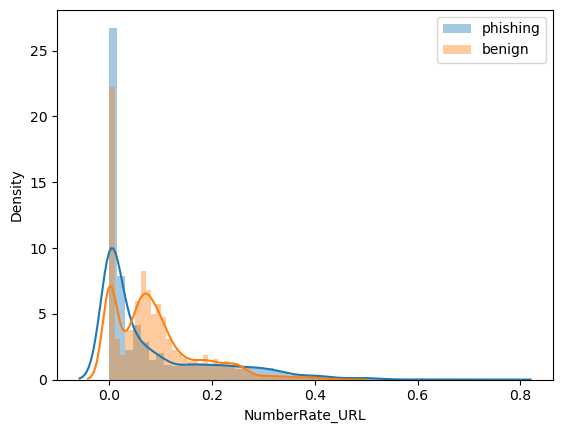

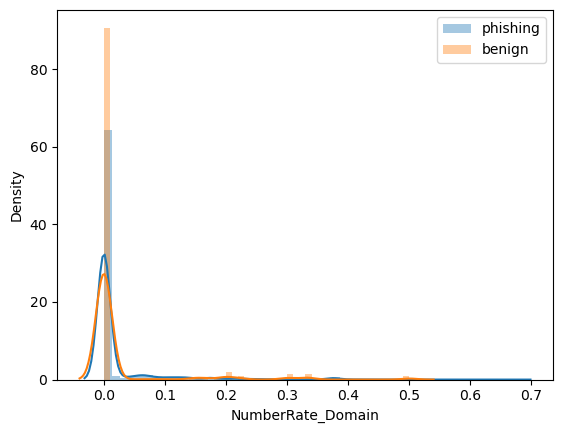

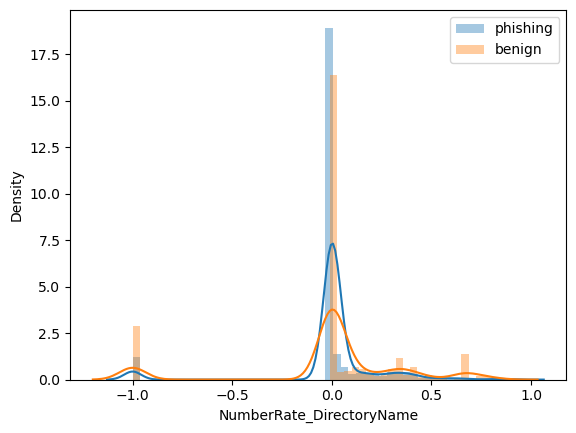

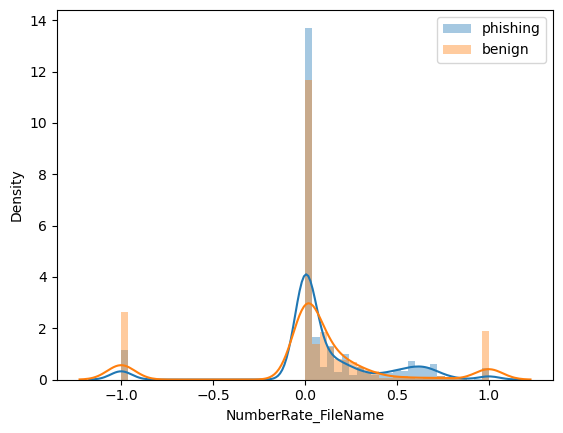

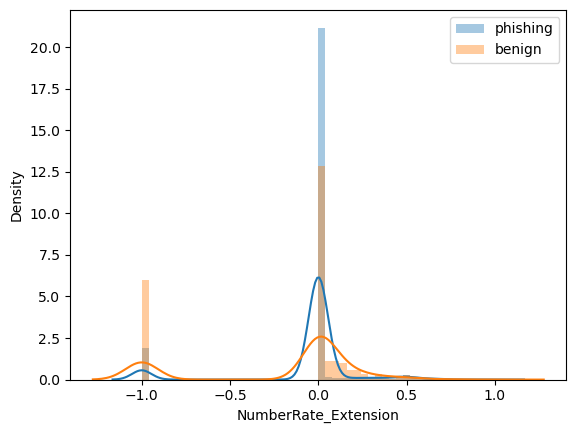

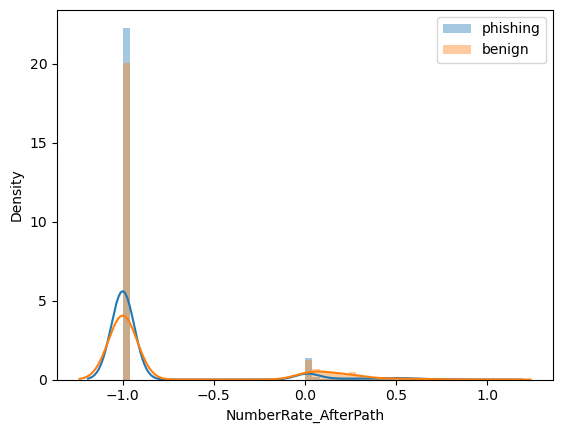

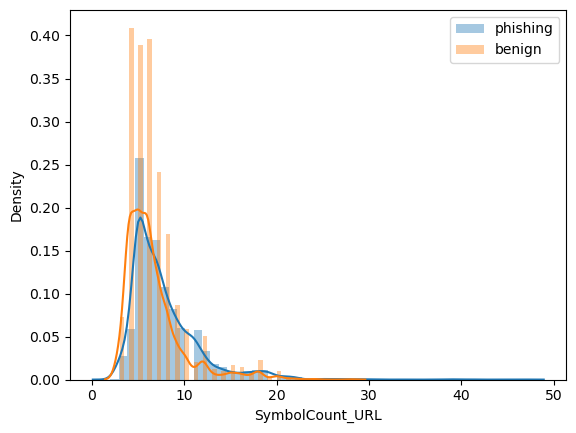

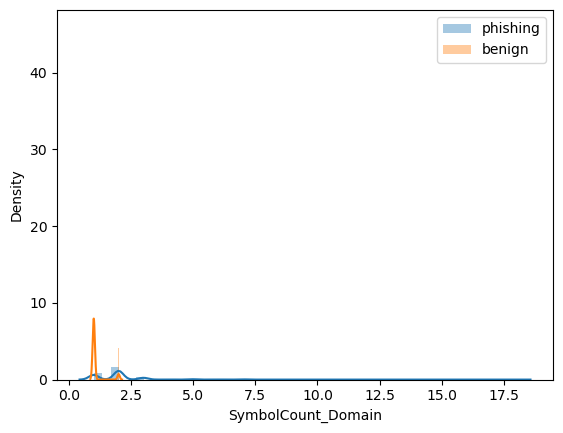

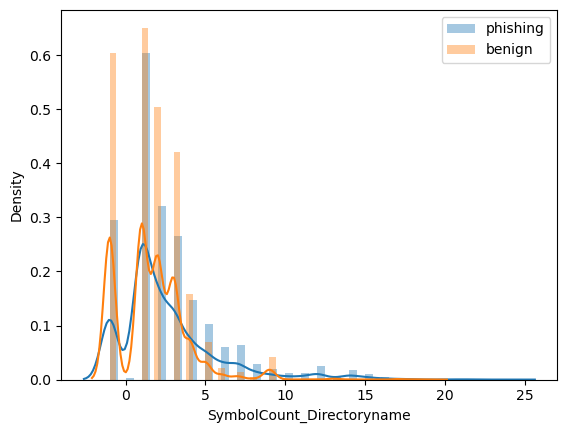

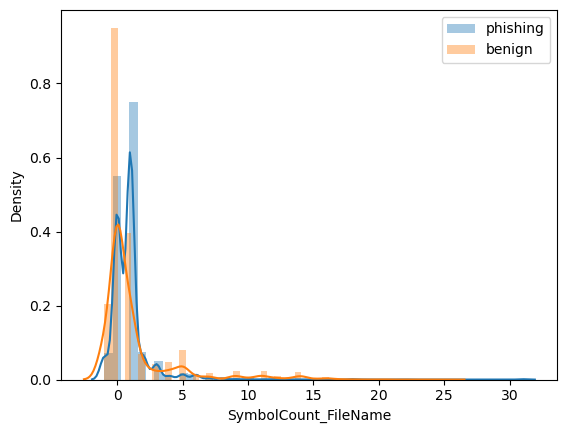

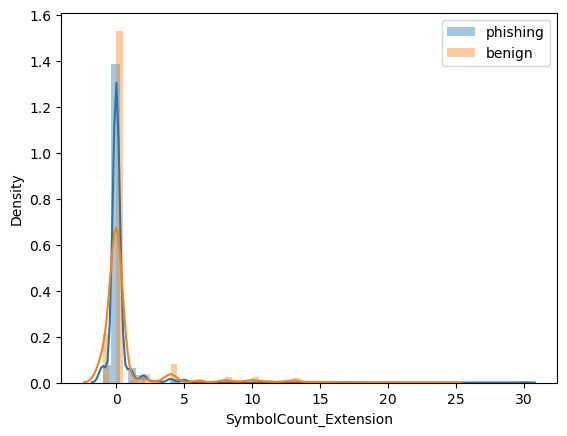

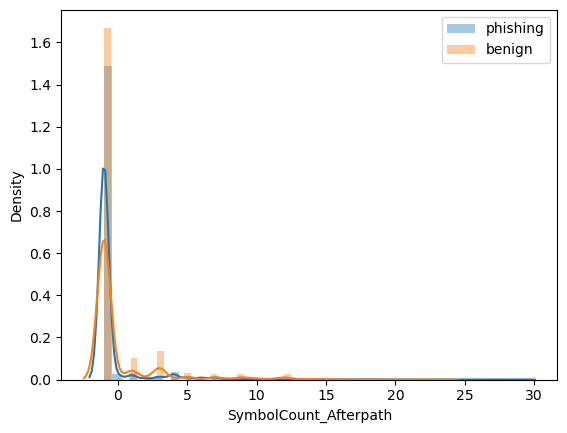

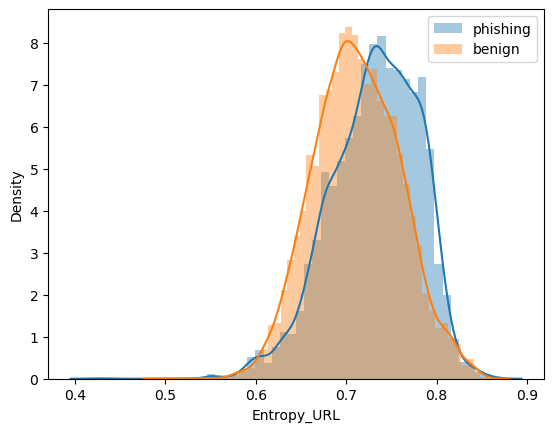

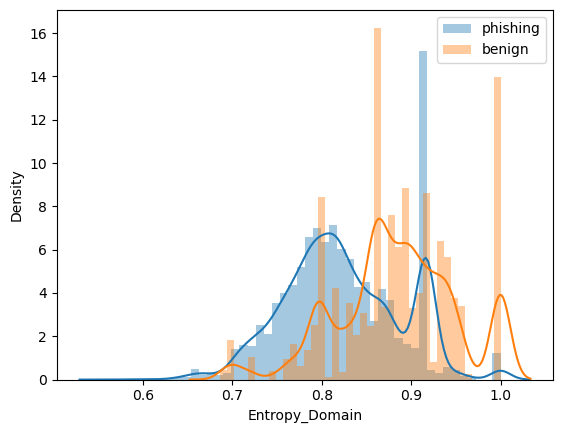

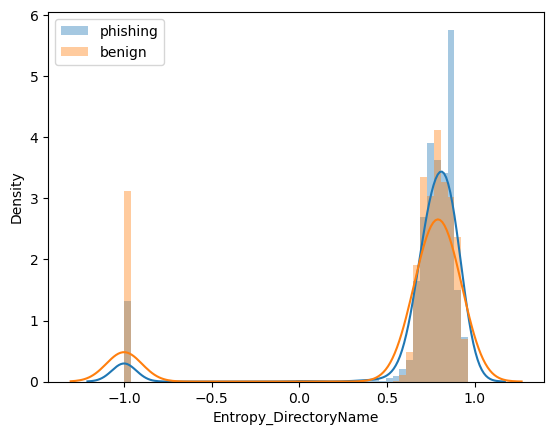

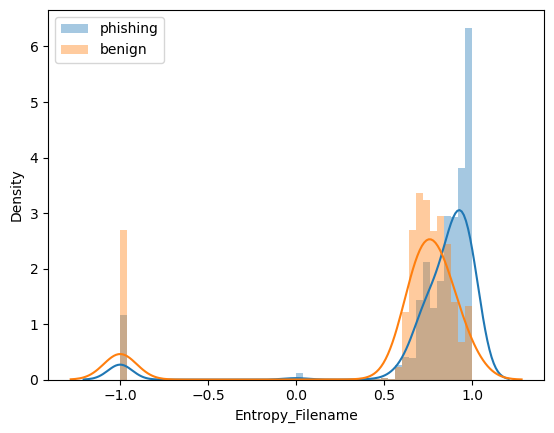

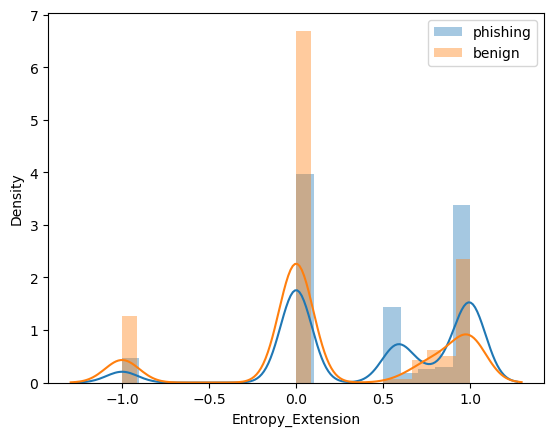

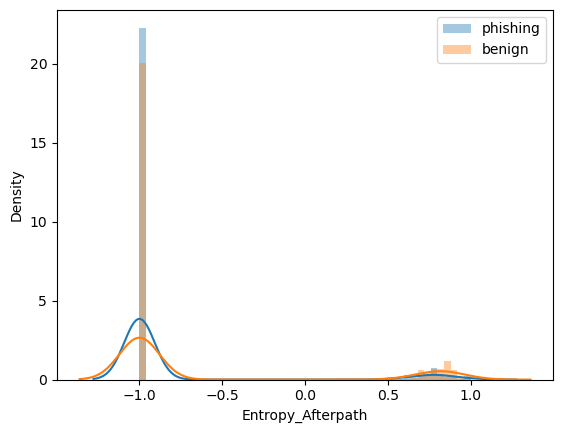

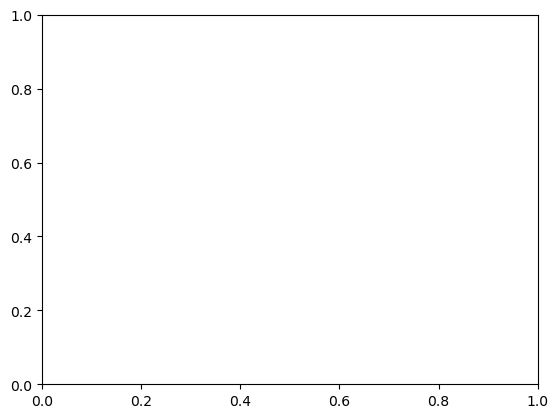

In [17]:
for col in df.columns:
    plt.figure()
    sns.distplot(phishing_df[col], label = "phishing")
    sns.distplot(benign_df[col], label = "benign")
    plt.legend()
